# Analyzing COVID-19 Data in Python

COVID-19, also known as Coronavirus, is a respitory illness that was first detected in Wuhan, China and quickly spread across the world becoming a global pandemic. COVID-19 had never been seen before in humans so research in this illness is vital to understanding the virus in order to find a vaccination and to prevent more deaths in the future.  

## Data Source

The data is downloaded from [European Centre for Disease Prevention and Control] (https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). Upload the data to an S3 bucket, and import the necessary python libraries.

In [56]:
%matplotlib inline 
import pandas

## Data from my S3 Bucket 

In [57]:
df = pandas.read_excel('s3://isat252-widner/COVID-19-geographic-disbtribution-worldwide.xlsx')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-06-09,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-06-08,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-06-07,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-06-06,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-06-05,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-06-04,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-06-03,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-06-02,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-06-01,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-31,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia


## The Top 20 Countries with the Most Amount of Cases 

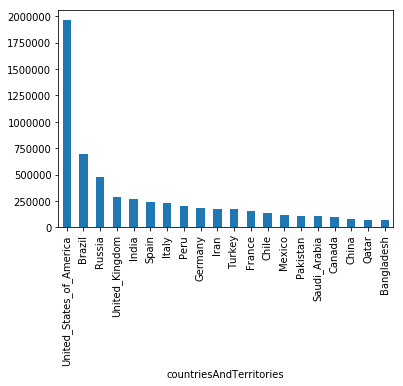

In [58]:
country_most_cases = df.groupby('countriesAndTerritories').sum()['cases']
country_most_cases.nlargest(20).plot.bar()

This shows the Countries and Territories who have the least amount of cases. 

## Deaths Per Day World Wide

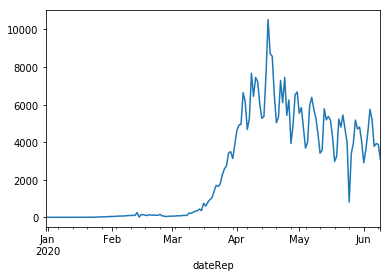

In [59]:
death_per_day= df.groupby('dateRep').sum()['deaths']
death_per_day.plot()

Deaths due to COVID-19 hit a peal in mid to late April but have continued on a downward slope since then. 

## Select Brazil Data  

In [64]:
brazil_data = df.loc[df['countriesAndTerritories'] == 'Brazil']
brazil_data [:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
2915,2020-06-09,9,6,2020,18912,525,Brazil,BR,BRA,209469333.0,America
2916,2020-06-08,8,6,2020,27075,904,Brazil,BR,BRA,209469333.0,America
2917,2020-06-07,7,6,2020,30830,1005,Brazil,BR,BRA,209469333.0,America
2918,2020-06-06,6,6,2020,0,0,Brazil,BR,BRA,209469333.0,America
2919,2020-06-05,5,6,2020,30925,1473,Brazil,BR,BRA,209469333.0,America
2920,2020-06-04,4,6,2020,28633,1349,Brazil,BR,BRA,209469333.0,America
2921,2020-06-03,3,6,2020,28936,1262,Brazil,BR,BRA,209469333.0,America
2922,2020-06-02,2,6,2020,11598,623,Brazil,BR,BRA,209469333.0,America
2923,2020-06-01,1,6,2020,16409,480,Brazil,BR,BRA,209469333.0,America
2924,2020-05-31,31,5,2020,33274,956,Brazil,BR,BRA,209469333.0,America


Data reguarding Brazil's coronavirus status. 

## Number of Death Per Day in Brazil 

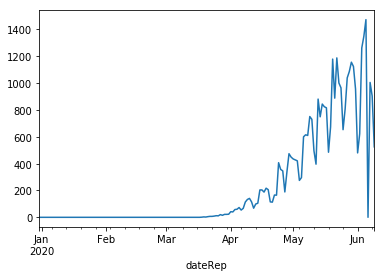

In [65]:
brazil_death_per_day = brazil_data.groupby('dateRep').sum()['deaths']
brazil_death_per_day.plot()

This shows the number of deaths per day in Brazil. Brazil hit its' peak just a few days ago with a little over 14,000 deaths but this number still has potential to increase.  

## The Relationship between Deaths and Cases in Brazil 

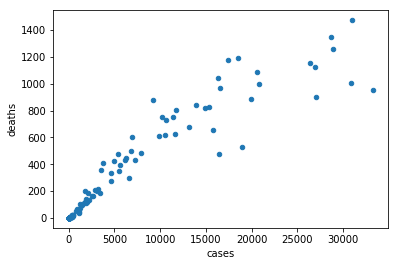

In [66]:
brazil_data.plot.scatter(x = 'cases',y = 'deaths')

This shows the positive relationship between deaths and cases in Brazil. 

## Linear Regression of Brazil 

In [67]:
from scipy import stats

In [68]:
result = stats.linregress(brazil_data['deaths'],brazil_data['cases'])

In [69]:
print(' r square is {}'.format(result.rvalue * result.rvalue))

 r square is 0.8984018099611122


The r-square value is close to 1 which tells us that the number of cases correlates directly to the number of deaths. 

## Conclusion and Limitations 

After looking at the data showing the top 20 countries with the most cases of coronavirus, I chose to analyze data from the no. 2 country, Brazil. As seen in my second chart, deaths worldwide are on a downward slope but this is not the case for Brazil. The number of deaths per day due to COVID-19 in Brazil are still on an upward slope. This is due to the increasing number of cases that Brazil has, shown in my forth chart. I then backed up my obsevation from my forth chart by running a linear regresssion on these two variables to determine the r-square value which proved that the variables have a positive linear realtionship and correlate to each other. 

In the third graph, which shows the number of deaths per day in Brazil, shows a weird drop just a few days ago which appears to be some kind of mistake in the data because there are zero deaths. This shows that all the data may not be 100% accurate. We also only had 2 days to do this project and while Brazil still appears to be on its upward slope, it may have been more beneficial for me to have more time to observe to see how long it would be until Brazil is on a downward slope to compare it to how long it took for other countries. 

# Project by Lillian Widner 

## B.B.A. Major in Finance, Minor in Computer Information Systems